## Collinear features and their effect on linear models

In [44]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head(2)

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [5]:
X.shape, Y.shape

((100, 7), (100,))

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression

<b>1. Finding the Correlation between the features</b>

      a. check the correlation between the features


In [6]:
# data.corr()['y']
data.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


      b. plot heat map of correlation matrix using seaborn heatmap


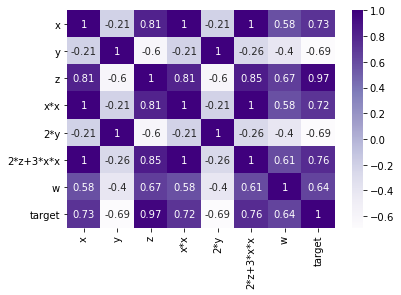

In [7]:
sns.heatmap(data.corr(), cmap = 'Purples',annot = True)
plt.show()

 <b>  2. Finding the best model for the given data</b>

      a. Train Logistic regression on data(X,Y) that we have created in the above cell
            
      b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or            random search CV make sure you choose the alpha in log space)
   
      c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), 
         name the best model as 'best_model'
    

In [8]:
# classifier = SGDClassifier(loss = 'log')
# classifier.fit(X, Y)
# print(classifier.coef_, classifier.intercept_)

param_grid = {'alpha':[0.00001,0.0001,0.01,1,100]}
classifier = SGDClassifier(loss = 'log',random_state = 100)
random = RandomizedSearchCV(estimator=classifier, param_distributions=param_grid)
random.fit(X,Y)
print(random.best_estimator_.alpha)

1e-05


In [9]:
best_model = SGDClassifier(loss = 'log',random_state = 100, alpha= random.best_estimator_.alpha)

3. <b>Getting the weights with the original data</b>
   
       a. train the 'best_model' with X, Y
  

In [10]:
best_model.fit(X, Y)

SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=100, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

       b. Check the accuracy of the model 'best_model_accuracy'
 

In [11]:
pred_y = best_model.predict(X)
best_model_accuracy = accuracy_score(Y, pred_y)
print(best_model_accuracy)
# print(accuracy_score(Y, pred_y, normalize=False))

1.0


       c. Get the weights W using best_model.coef_



In [12]:
W = best_model.coef_
print(W)

[[ 17.84237712 -16.34910934  21.43527775  16.11504496 -16.34910934
   17.09161722  12.55007277]]


4. <b>Modifying original data</b>

       a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)


In [13]:
_X = np.add(X, 0.01)

       b. Train the same 'best_model' with data (X', Y)


In [14]:
best_model.fit(_X, Y)

SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=100, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

       c. Check the accuracy of the model 'best_model_accuracy_edited'


In [15]:
_pred_y = best_model.predict(_X)
best_model_accuracy_edited = accuracy_score(Y, _pred_y)
print(best_model_accuracy_edited)
# print(accuracy_score(Y, pred_y, normalize=False))

1.0


        d. Get the weights W' using best_model.coef_


In [16]:
_W = best_model.coef_
print(_W)

[[ 19.96801816 -26.28921167  42.47914364  16.41452694 -26.28921167
   19.89982948  25.15716337]]


    
5. <b> Checking deviations in metric and weights </b>
    
       a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
  

In [17]:
print((best_model_accuracy_edited - best_model_accuracy))

0.0


       b. find the absolute change between each value of W and W' ==> |(W-W')|
   

In [19]:
print(abs(W - _W))

[[ 2.12564104  9.94010232 21.04386589  0.29948197  9.94010232  2.80821226
  12.6070906 ]]


       c. print the top 4 features which have higher % change in weights compare to the other feature



In [33]:
top_4 = np.argsort(abs(W - _W)[0])[::-1][:4]
# print(top_4)
print(data.columns[top_4])

Index(['z', 'w', '2*y', 'y'], dtype='object')


</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [35]:
X.shape, Y.shape

((100, 7), (100,))

In [36]:
# classifier = SGDClassifier(loss = 'log')
# classifier.fit(X, Y)
# print(classifier.coef_, classifier.intercept_)

param_grid = {'alpha':[0.00001,0.0001,0.01,1,100]}
classifier = SGDClassifier(loss = 'hinge',random_state = 100)
random = RandomizedSearchCV(estimator=classifier, param_distributions=param_grid)
random.fit(X,Y)
print(random.best_estimator_.alpha)

1e-05


In [37]:
best_model = SGDClassifier(loss = 'hinge',random_state = 100, alpha= random.best_estimator_.alpha)

In [38]:
best_model.fit(X, Y)

SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=100, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
_pred_y = best_model.predict(_X)
best_model_accuracy_edited = accuracy_score(Y, _pred_y)
print(best_model_accuracy_edited)
# print(accuracy_score(Y, pred_y, normalize=False))

1.0


In [40]:
_W = best_model.coef_
print(_W)

[[ 22.29518667 -19.92287822  27.41616945  20.05847633 -19.92287822
   21.36282798   5.47346723]]


In [41]:
print((best_model_accuracy_edited - best_model_accuracy))

0.0


In [42]:
print(abs(W - _W))

[[4.45280954 3.57376887 5.98089169 3.94343137 3.57376887 4.27121076
  7.07660554]]


In [43]:
top_4 = np.argsort(abs(W - _W)[0])[::-1][:4]
# print(top_4)
print(data.columns[top_4])

Index(['w', 'z', 'x', '2*z+3*x*x'], dtype='object')


Summary:-

  1.For the model to be stable enough, the above variance should be low. If the variance of the weights is high, it means  
    that the model is very sensitive to data. The weights differ largely with training data if the variance is high. It 
    means that the model might not perform well with test data. 
    
  2.The deviations in weights for LR is much greater than that of SVM. This is expected as SVM finds optimal hyperplane 
    seperating the classes and hence a little added noise would not affect the decision boundary much.
 